In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv('student-mat.csv')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
len(data.columns)

33

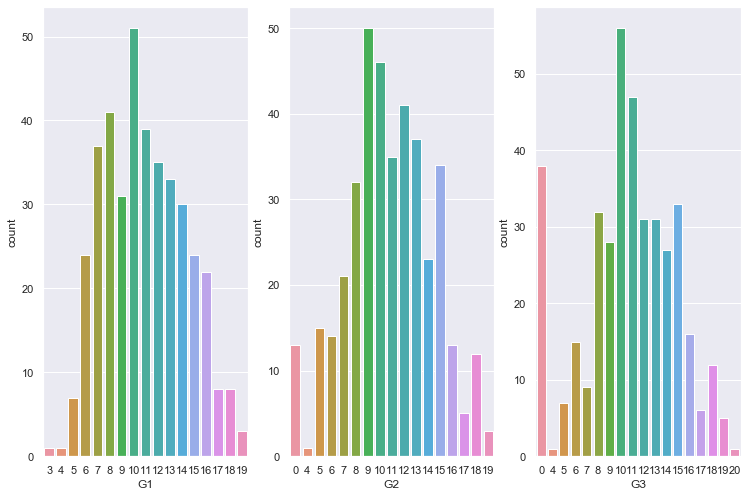

In [7]:
sns.set(rc={'figure.figsize':(12.5,8.27)})
fig, axs = plt.subplots(ncols=3)
sns.countplot(x='G1',  data=data, ax=axs[0])
sns.countplot(x='G2', data=data, ax=axs[1])
sns.countplot(x='G3', data=data, ax=axs[2])

In [8]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

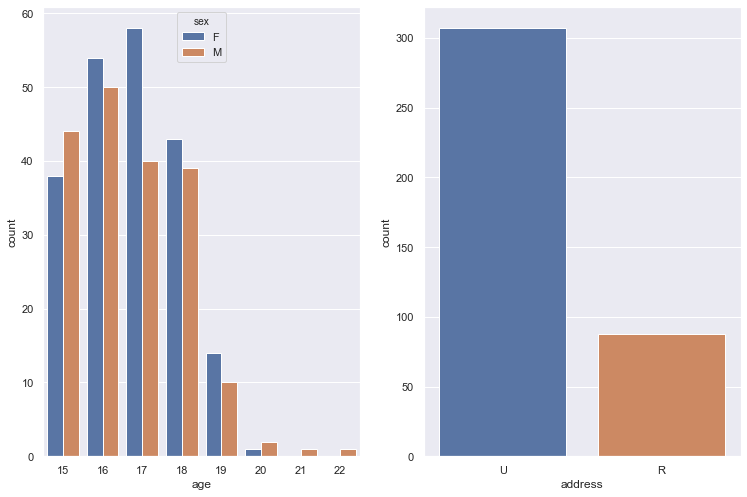

In [9]:
fig, axs = plt.subplots(ncols=2)
sns.countplot(x='age', hue='sex', data=data, ax=axs[0])
sns.countplot(x='address', data=data, ax=axs[1])

In [10]:
data['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [11]:
data.drop('school', axis=1, inplace=True)

In [12]:
enc_data = data.copy()

In [13]:
enc_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [14]:
#MAPPING BINARY DATA

In [15]:
categorical_d = {'yes': 1, 'no': 0}
enc_data['schoolsup'] = enc_data['schoolsup'].map(categorical_d)
enc_data['famsup'] = enc_data['famsup'].map(categorical_d)
enc_data['paid'] = enc_data['paid'].map(categorical_d)
enc_data['activities'] = enc_data['activities'].map(categorical_d)
enc_data['nursery'] = enc_data['nursery'].map(categorical_d)
enc_data['higher'] = enc_data['higher'].map(categorical_d)
enc_data['internet'] = enc_data['internet'].map(categorical_d)
enc_data['romantic'] = enc_data['romantic'].map(categorical_d)

In [16]:
categorical_d = {'F': 1, 'M': 0}
enc_data['sex'] = enc_data['sex'].map(categorical_d)

categorical_d = {'U': 1, 'R': 0}
enc_data['address'] = enc_data['address'].map(categorical_d)

categorical_d = {'LE3': 1, 'GT3': 0}
enc_data['famsize'] = enc_data['famsize'].map(categorical_d)

categorical_d= {'T': 1, 'A': 0}
enc_data['Pstatus'] = enc_data['Pstatus'].map(categorical_d)

In [17]:
enc_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,15,1,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [18]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [19]:
enc_data['Mjob'] = le.fit_transform(enc_data['Mjob'])
enc_data['Fjob'] = le.fit_transform(enc_data['Fjob'])
enc_data['reason'] = le.fit_transform(enc_data['reason'])
enc_data['guardian'] = le.fit_transform(enc_data['guardian'])

In [20]:
enc_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [21]:
enc_data['GradeAvg'] = (enc_data['G1'] + enc_data['G2'] + enc_data['G3']) / 3

In [22]:
enc_data['GradeAvg']

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: GradeAvg, Length: 395, dtype: float64

In [23]:
enc_data.drop(['age','G1','G2','G3'], axis=1, inplace=True)

In [24]:
enc_data.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,GradeAvg
0,1,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5.666667
1,1,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5.333333
2,1,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,8.333333
3,1,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,14.666667
4,1,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,8.666667


In [25]:
from sklearn.model_selection import train_test_split

In [38]:
X = enc_data.drop("GradeAvg",axis=1)
y = enc_data['GradeAvg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [63]:
LinR = LinearRegression()
LinR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = LinR.predict(X_test)

In [65]:
LinR.score(X_test, y_test)

0.20178937274187136

In [66]:
LinR.score(X_train, y_train)

0.28343875156858445

In [53]:
knn = KNeighborsClassifier()

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
# enc_data.info()

In [71]:
demo = enc_data

In [72]:
demo['GradeAvg'] = demo['GradeAvg'].astype(int)

In [73]:
demo.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,GradeAvg
0,1,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5
1,1,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5
2,1,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,8
3,1,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,14
4,1,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,8


In [74]:
X = demo.drop("GradeAvg",axis=1)
y = demo['GradeAvg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [68]:
pred = knn.predict(X_test)

In [69]:
knn.score(X_test, y_test)

0.09243697478991597

In [70]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [76]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))